In [1]:
include("TontiDiagrams.jl")
using .Tonti
using CombinatorialSpaces
using DifferentialEquations
using Plots

## Define the Tonti Diagram

In [2]:
td = TontiDiagram(1, [:x=>:IP,  :v =>:TP,  :Δx=>:IL,
                      :p=>:IL2, :∑f=>:TL2, :f =>:TP2]);

## Add the physics

In [3]:
x0 = 1
k = 0.1
m = 1

addTransform!(td, [:Δx], Δx->k*(x0 .- Δx), [:f])
addTransform!(td, [:p], p->p/m, [:v]);

## Define the complex

In [4]:
num_oscillators = 10

s = OrientedDeltaSet1D{Bool}()
add_vertices!(s, num_oscillators)
add_edges!(s, 1:(num_oscillators-1), 2:(num_oscillators), edge_orientation=true);

## Add spatial and temporal transforms

In [5]:
addSpace!(td, s)
addTime!(td);

## Generate vectorfield

In [6]:
sim, data_length = vectorfield(td, s)
du = zeros(sum(data_length))
u = [zeros(l) for l in data_length]

u[1] .= [j*(x0*0.9) for j in 1:data_length[1]]

prob = ODEProblem(sim, vcat(u...), (0,1000.0))
sol = solve(prob);

## 1D Harmonic system without viscosity


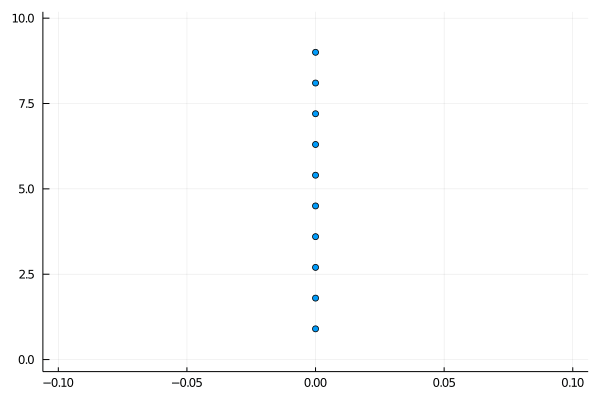

In [7]:
vals = sol(range(0, 1000, length=200))
anim = @animate for loc ∈ vals
    plot(zeros(num_oscillators),loc[1:num_oscillators], legend=:none, seriestype = :scatter, ylims=[minimum(vals),maximum(vals)], xlims=[-0.1, 0.1])
end
gif(anim, fps = 30)

## 1D Harmonic system with viscosity

In [8]:
visc = 0.01
addTransform!(td, [:v], v->(-v*visc), [:∑f]);

sim, data_length = vectorfield(td, s)

prob = ODEProblem(sim, vcat(u...), (0,1000.0))
sol = solve(prob);


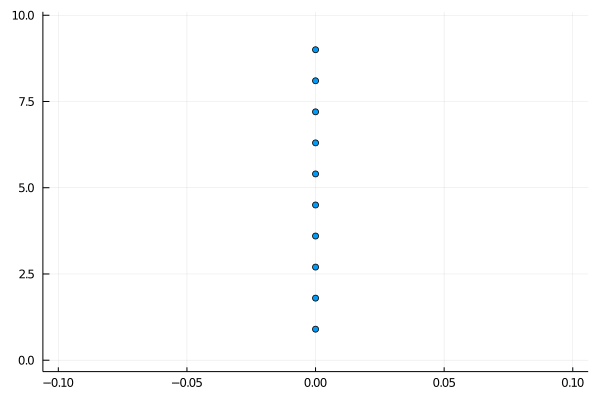

In [9]:
vals = sol(range(0, 1000, length=200))
anim = @animate for loc ∈ vals
    plot(zeros(num_oscillators),loc[1:num_oscillators], legend=:none, seriestype = :scatter, ylims=[minimum(vals),maximum(vals)], xlims=[-0.1, 0.1])
end
gif(anim, fps = 30)